In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


genesect
(56, 68)


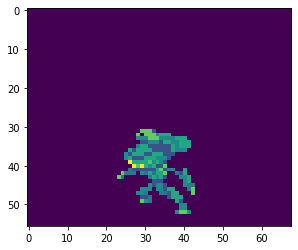

In [ ]:
import matplotlib.pyplot as plt

n=245# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [ ]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img
print('Dimensión de los datos {}'.format(data.shape))
np.mean(data)

In [ ]:
from sklearn.decomposition import PCA
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components = 100)

# Ajuste y transformación de los datos
pca.fit(data)
X_pca = pca.transform(data)

# Ejercicio 1

### Silhouette

In [ ]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

# importamos los algoritmos de clusterizacion
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [ ]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

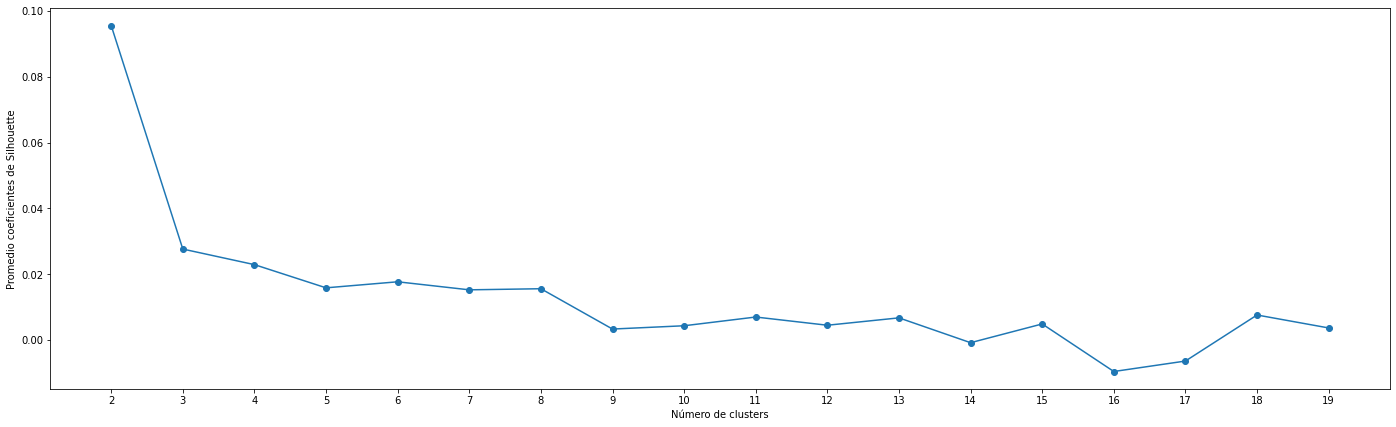

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.plot(range(2, 20), silhouette_coefficients,"-o")
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

#2)

### k=8

No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

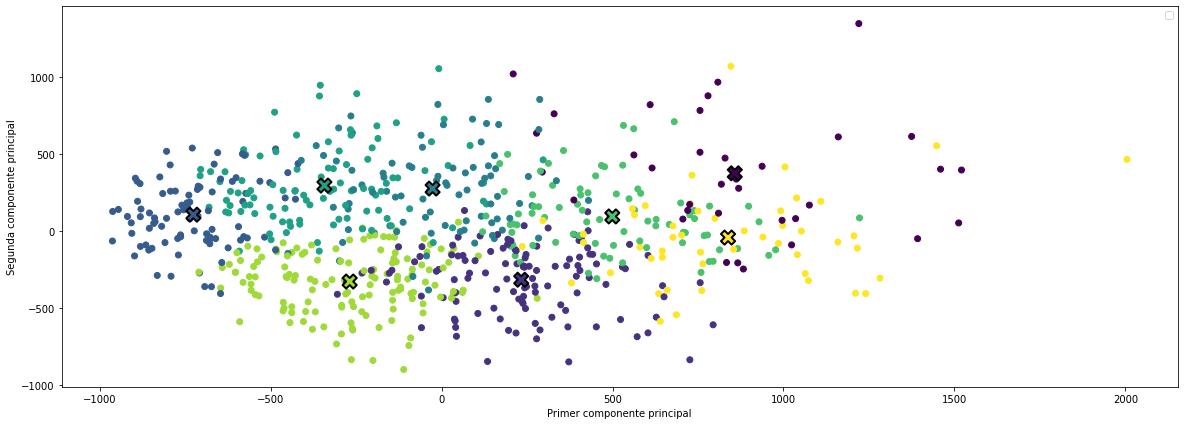

In [ ]:
# Creación del modelo KMeans con k = 8
kmeans8 = KMeans(n_clusters=8)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans8.fit_predict(X_pca)

# Guardamos la posición de los centroids
centroids8 = kmeans8.cluster_centers_

# Plot
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans8.labels_)
ax.scatter(centroids8[:, 0], centroids8[:, 1], marker="X", s=200, linewidths=2,
            c=np.unique(kmeans8.labels_),edgecolors='black')
ax.legend()

## Por cada dato escribimos a qué instancia corresponde
#for i in range(data.shape[0]):
#  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [ ]:
# Nos fijamos las etiquetas asignadas a las primeras 10 muestras y los counts que recibió cada una
from sklearn.cluster import KMeans
np.unique(kmeans8.labels_[:10], return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int32), array([3, 2, 1, 1, 1, 2]))

# 3) Graficamos los 10 primeros pokemones de cada cluster:

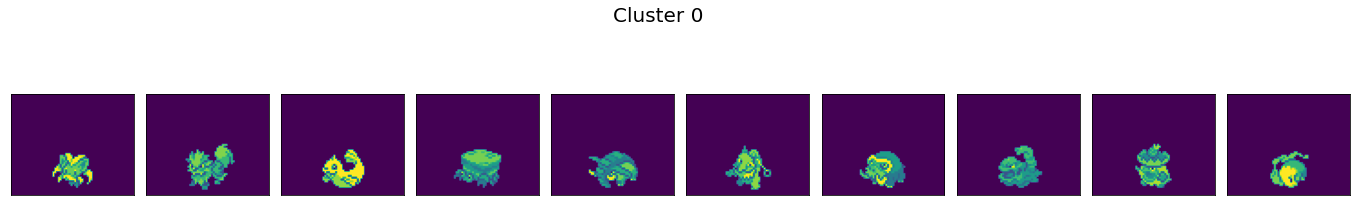

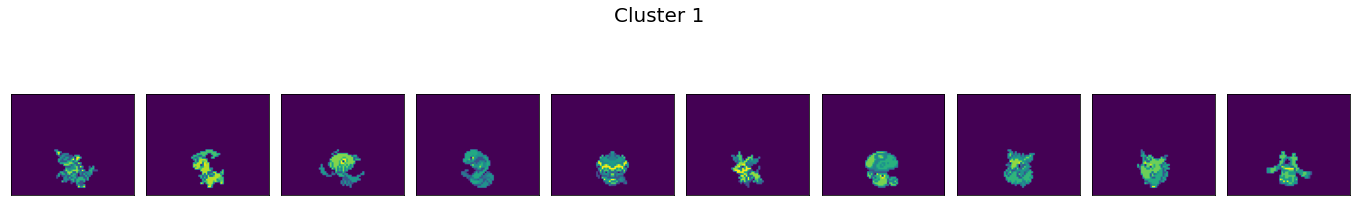

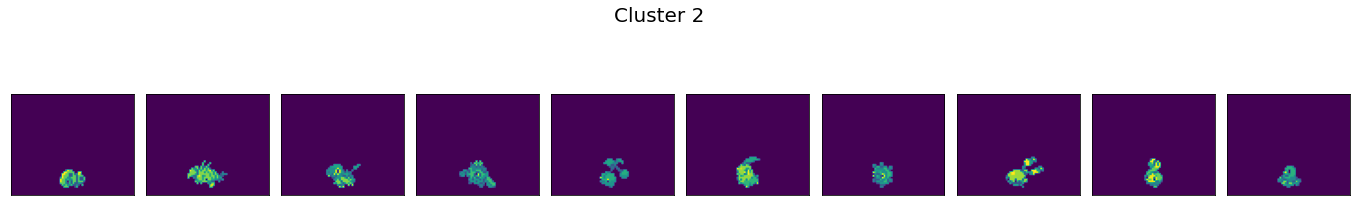

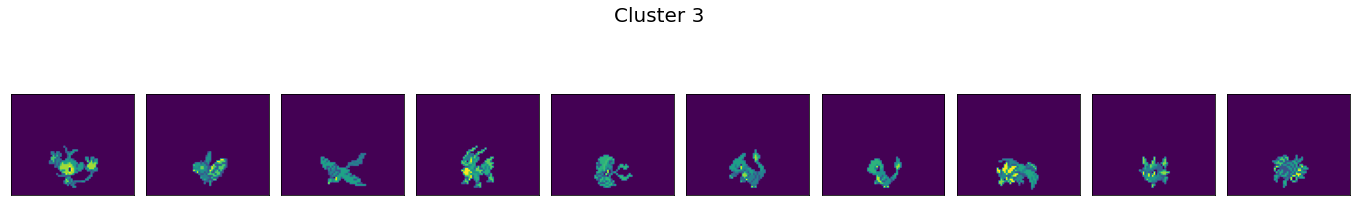

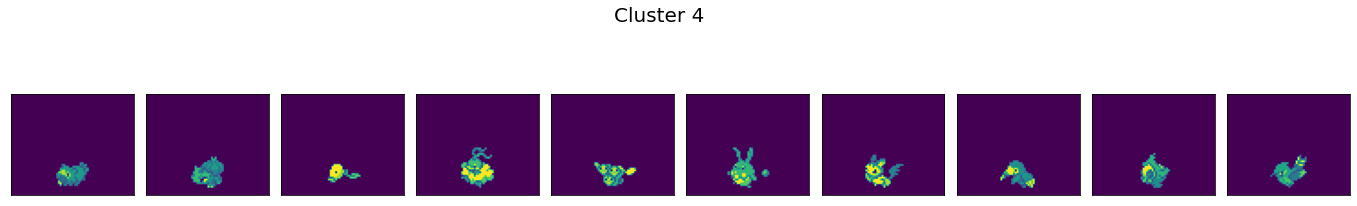

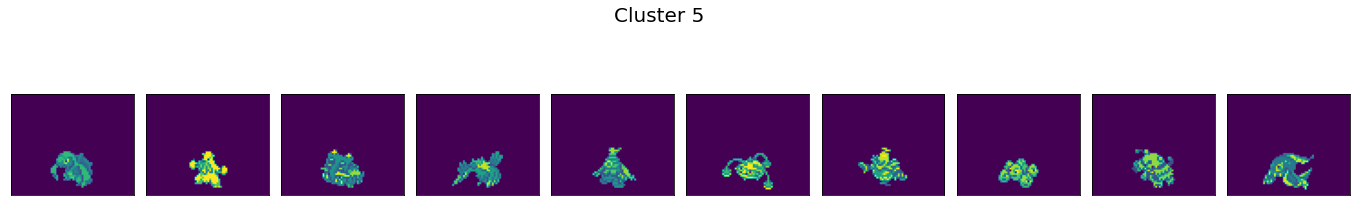

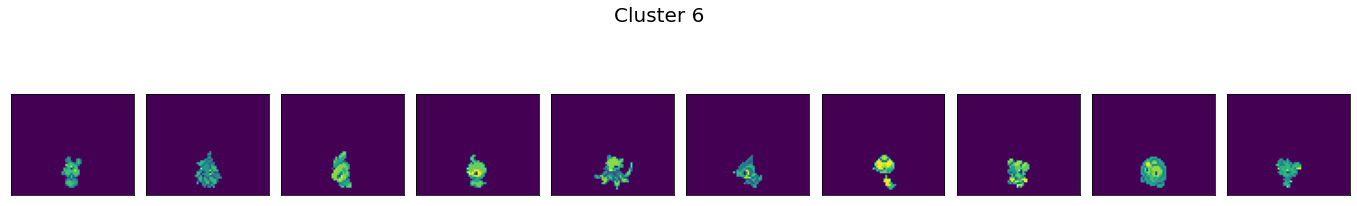

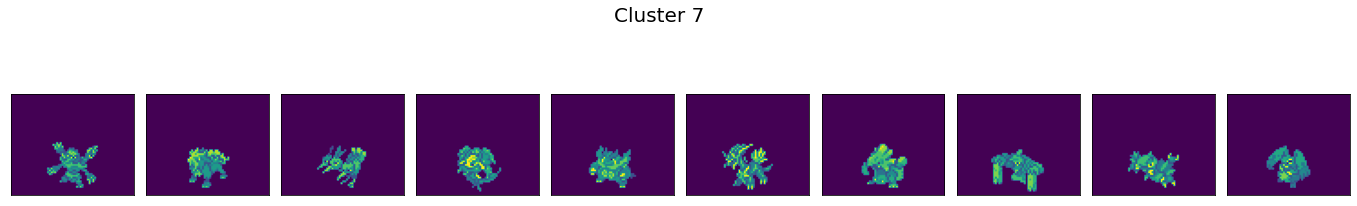

In [ ]:
# Mostrar el resultado final
labels = kmeans8.labels_

# Iniciamos un for con k=40 iteraciones
for i in range(8):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = len(index)                                                    # el número de samples en cada cluster
    this_pokes = data[index].reshape(len(index),56,68)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, 10, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_pokes[i])

#4) Grafico de barras en funcion de HP, Attack ,Speed y Defence

In [ ]:
import pandas as pd
df=pd.DataFrame(kmeans8.fit_predict(X_pca))
df=df.assign(Nombres=nombres) # añadimos la nueva columna de goles totales al df
df.columns=['Grupo','Name']

In [ ]:
df.set_index('Name', inplace = True)

Ordenamos por nombre nuestro DataFrame, queremos que tanto el dataframe que contiene los atributos de los pokemon como el dataframe generado por nosotros, que contiene los grupos de cada pokemon, esten ordenados de la misma manera.

In [ ]:
df=df.sort_values(by=['Name'],axis='index')

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
pokemons = pd.read_csv(filename)
pokemons.set_index('Name', inplace = True)
pokemons.pop('Unnamed: 0')
pokemons.pop('#')
pokemons.pop('Generation')
pokemons.pop('index')
pokemons.pop('level_0')
poke=pokemons.sort_values(by=['Name'],axis='index')
poke

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Name,,,,,,,,,,
abomasnow,Grass,Ice,494,90,92,75,92,85,60,False
abra,Psychic,NaN,310,25,20,15,105,55,90,False
absol,Dark,NaN,465,65,130,60,75,60,75,False
accelgor,Bug,NaN,495,80,70,40,100,60,145,False
aerodactyl,Rock,Flying,515,80,105,65,60,75,130,False
...,...,...,...,...,...,...,...,...,...,...
zigzagoon,Normal,NaN,240,38,30,41,30,41,60,False
zoroark,Dark,NaN,510,60,105,60,120,60,105,False
zorua,Dark,NaN,330,40,65,40,80,40,65,False


Le añadimos como columna al df con los datos, el grupo al que pertenece cada pokemon.

In [ ]:
groups=df['Grupo']
poke=poke.assign(groups=groups)
pokes_sep=poke.groupby(by='groups')

In [ ]:
list(pokes_sep)

Obtenemos los grupos

In [ ]:
dfp=pokes_sep.mean()
dfp['groups']=[1,2,3,4,5,6,7,8]
dfp

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,groups
groups,,,,,,,,,
0,395.654321,69.000000,67.666667,67.432099,67.123457,64.617284,59.814815,0.012346,1
1,434.727273,68.151515,79.979798,70.989899,71.353535,68.080808,76.171717,0.060606,2
2,486.338462,78.907692,90.753846,77.400000,81.138462,80.276923,77.861538,0.123077,3
3,429.236364,66.581818,78.800000,71.836364,70.336364,75.918182,65.763636,0.045455,4
4,315.800000,52.152381,53.438095,55.485714,48.514286,52.466667,53.742857,0.000000,5
5,499.844156,88.922078,89.584416,87.922078,80.155844,85.116883,68.142857,0.038961,6
6,539.000000,83.745098,100.921569,95.862745,90.117647,84.666667,83.686275,0.274510,7
7,338.700000,57.163636,59.945455,58.390909,56.363636,55.454545,51.381818,0.009091,8


Hay algunas columnas que no aportan, despues las voy a sacar.

Graficamos...
Para graficar se me complicó un poco entonces tengo 2 alternativas:

#### Alternativa 1: Muchos plots

In [ ]:
import matplotlib.pyplot as plt
#ploteamos barras de ataque
df_ordenado=dfp.sort_values(by=['Attack'], ascending=False) #Ordenamos descendentemente
ax = df_ordenado.plot.bar(x='groups', y='Attack', rot=0,figsize=(10, 5),color = plt.get_cmap('Set3').colors)
ax.set_title('Ataque',fontsize='20')
ax.set_ylabel('mean attack',fontsize=16)
ax.set_xlabel('groups',fontsize=16)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)

#ploteamos barras de defensa
df_ordenado2=dfp.sort_values(by=['Defense'], ascending=False)
ax = df_ordenado2.plot.bar(x='groups', y='Defense', rot=0,figsize=(10, 5),color = plt.get_cmap('Set3').colors)
ax.set_title('Defensa',fontsize='20')
ax.set_ylabel('mean defense',fontsize=16)
ax.set_xlabel('groups',fontsize=16)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)


#ploteamos barras de HP
df_ordenado3=dfp.sort_values(by=['HP'], ascending=False)
ax = df_ordenado3.plot.bar(x='groups', y='HP', rot=0,figsize=(10, 5),color = plt.get_cmap('Set3').colors)
ax.set_title('HP',fontsize='20')
ax.set_ylabel('mean HP',fontsize=16)
ax.set_xlabel('groups',fontsize=16)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)

#ploteamos barras de Speed
df_ordenado4=dfp.sort_values(by=['Speed'], ascending=False)
ax = df_ordenado4.plot.bar(x='groups', y='Speed', rot=0,figsize=(10, 5),color = plt.get_cmap('Set3').colors)
ax.set_title('Speed',fontsize='20')
ax.set_ylabel('mean Speed',fontsize=16)
ax.set_xlabel('groups',fontsize=16)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)


NameError: ignored

#### Alternativa 2: Un gran subplot (forma mas elegante pero menos informativa)

Creamos un nuevo dataframe solo con las categorias que nos importan graficar y usamos la función:

```
axes = dataframe.plot.bar(rot=0, subplots=True,figsize=(16,12))
```

para poder graficar todos de una. La desventaja es que el grafico queda medio medio.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#df_graf= pd.(df_ordenado['HP'],df_ordenado['Attack'],df_ordenado,['Defense'],df_ordenado['Speed'])
#dfg2=df_ordenado.pop(1)
#dfg3=dfg2.pop('Sp. Def')
#dfg4=dfg3.pop('Legendary')
#dfg5=dfg4.pop('groups')
df_graf=df_ordenado.drop(['Total','Sp. Atk' ,'Sp. Def','Legendary'], axis = 'columns', inplace=False)
df_graf2=df_graf.set_index("groups")

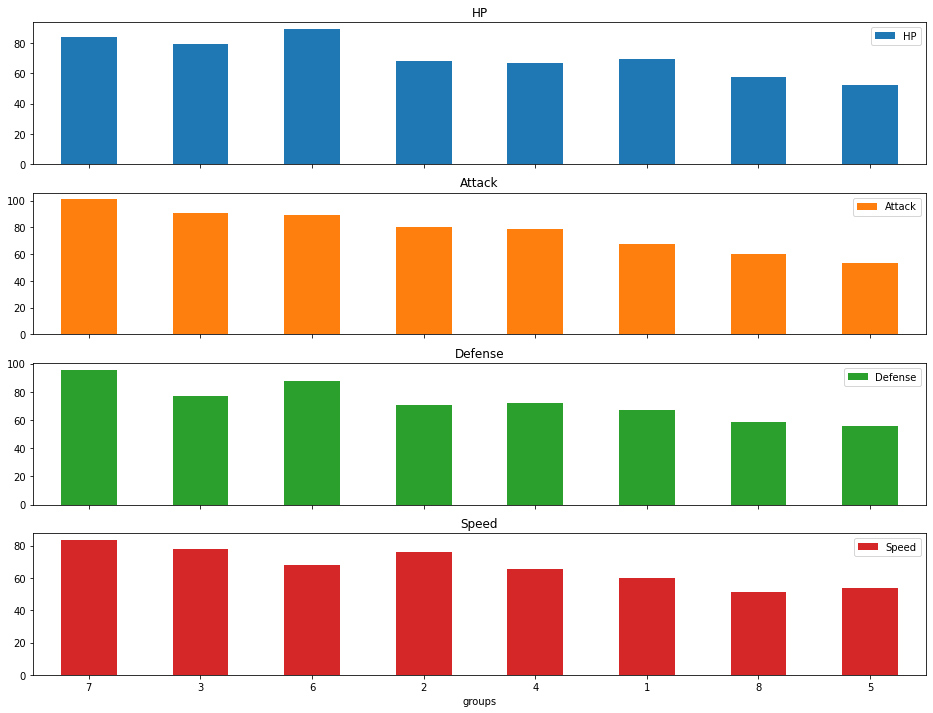

In [ ]:
dataframe = df_graf2
axes = dataframe.plot.bar(rot=0, subplots=True,figsize=(16,12))
print(axes)
plt.show()

Del grafico 'Alternativa 1' salen a la vista varias cosas:


    • Los grupos 7,6 y 3 parecen ser los que mas media overall tienen.

    • Los grupos 5 y 8 son los mas pedorros, en ese orden.

    • Los grupos 1,2,4 son los tipicos de mitad de tabla.

#5) Pokemones más fuertes

In [ ]:
import matplotlib.pyplot as plt

n=1# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

In [ ]:
#creamos un vector L con el tamaño de cada imagen
L=[]
for i in imagenes:
  L.append(np.count_nonzero(i))

In [ ]:
tam=pd.DataFrame(np.linspace(0,697,698))
tam['Name']=nombres
tam['Size']=L
df_tam=tam.sort_values(by=['Name'],axis='index')
size=df_tam.Size
siza=np.array(size)
poke['size']=siza

Ahora que tenemos nuestro dataframe con los nombres ordenados y el tamaño de la imagen, se lo ponemos a nuestro viejo df

In [ ]:
df_s=poke
df_s

In [ ]:
df_s_sep=df_s.groupby(by='groups')#separamos por grupos
dfsized=df_s_sep.mean() #calculamos el promedio del grupo
dfsized['groups']=[1,2,3,4,5,6,7,8]
dfsized

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,size,groups
groups,,,,,,,,,,
0,395.654321,69.000000,67.666667,67.432099,67.123457,64.617284,59.814815,0.012346,197.864198,1
1,434.727273,68.151515,79.979798,70.989899,71.353535,68.080808,76.171717,0.060606,204.878788,2
2,486.338462,78.907692,90.753846,77.400000,81.138462,80.276923,77.861538,0.123077,220.600000,3
3,429.236364,66.581818,78.800000,71.836364,70.336364,75.918182,65.763636,0.045455,188.900000,4
4,315.800000,52.152381,53.438095,55.485714,48.514286,52.466667,53.742857,0.000000,137.361905,5
5,499.844156,88.922078,89.584416,87.922078,80.155844,85.116883,68.142857,0.038961,282.701299,6
6,539.000000,83.745098,100.921569,95.862745,90.117647,84.666667,83.686275,0.274510,321.372549,7
7,338.700000,57.163636,59.945455,58.390909,56.363636,55.454545,51.381818,0.009091,133.509091,8


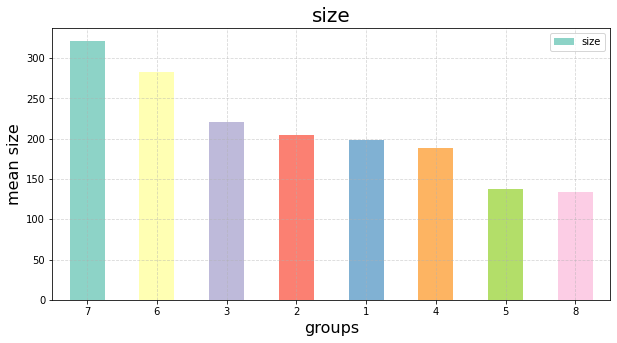

In [ ]:
#ploteamos barras de tamaño
df_ordenado5=dfsized.sort_values(by=['size'], ascending=False) #Ordenamos descendentemente
ax = df_ordenado5.plot.bar(x='groups', y='size', rot=0,figsize=(10, 5),color = plt.get_cmap('Set3').colors)
ax.set_title('size',fontsize='20')
ax.set_ylabel('mean size',fontsize=16)
ax.set_xlabel('groups',fontsize=16)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)

Efectivamente, recordando viejos resultados:

    • Los grupos 7,6 y 3 parecen ser los que mas media overall tienen.

    • Los grupos 5 y 8 son los mas pedorros, en ese orden.

    • Los grupos 1,2,4 son los tipicos de mitad de tabla.


Del grafico vemos claramente que 7,6 y 3, que son los mas grandes, son tambien los mas fuertes. Lo mismo pero a la inversa sucede con 5 y 8, son los mas debiles y tambien son los mas pequeños.

De esto concluímos que los pokemones más grandes son los más fuertes.



#6) Pokemones Legendarios

Para empezr le sacamos todas las columnas al df, menos la de promedio de legendarios

In [ ]:
df_ordenado

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,groups
groups,,,,,,,,,
6,539.000000,83.745098,100.921569,95.862745,90.117647,84.666667,83.686275,0.274510,7
2,486.338462,78.907692,90.753846,77.400000,81.138462,80.276923,77.861538,0.123077,3
5,499.844156,88.922078,89.584416,87.922078,80.155844,85.116883,68.142857,0.038961,6
1,434.727273,68.151515,79.979798,70.989899,71.353535,68.080808,76.171717,0.060606,2
3,429.236364,66.581818,78.800000,71.836364,70.336364,75.918182,65.763636,0.045455,4
0,395.654321,69.000000,67.666667,67.432099,67.123457,64.617284,59.814815,0.012346,1
7,338.700000,57.163636,59.945455,58.390909,56.363636,55.454545,51.381818,0.009091,8
4,315.800000,52.152381,53.438095,55.485714,48.514286,52.466667,53.742857,0.000000,5


In [ ]:
df_leyend=df_ordenado.drop(['Total','Sp. Atk' ,'Sp. Def','HP','Attack','Defense','Speed'], axis = 'columns', inplace=False)
df_l2=df_leyend.set_index("groups")

Graficamos

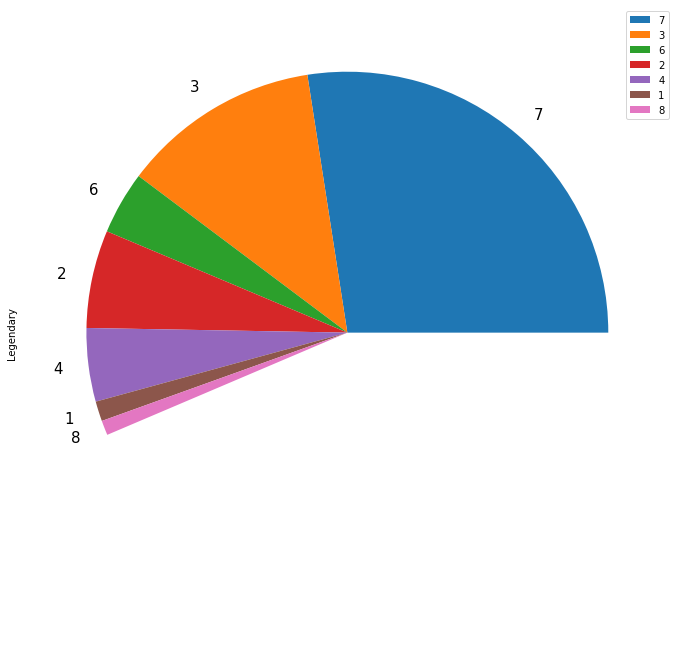

In [ ]:
dataframe = df_l2
axes = dataframe.plot.pie(rot=120, subplots=True,figsize=(16,12),fontsize=15)
print(axes)
plt.show()

Recordando viejos resultados:

    • Los grupos 7,6 y 3 parecen ser los que mas media overall tienen.

    • Los grupos 5 y 8 son los mas pedorros, en ese orden.

    • Los grupos 1,2,4 son los tipicos de mitad de tabla.



Claramente los clusters con mayor porcentaje de pokemones legendarios son los mas fuertes